In [1]:
import sys
import os.path
import networkx as nx
import csv
DATA_DIR = "/Users/kaho/projects/data_l109/small_foursquare_dataset"
transit = []
with open(os.path.join(DATA_DIR, "new_york_placenet_transitions.txt"), 'r') as f:
    r = csv.DictReader(f)
    for row in r:
        transit.append({"from": int(row["from"]),
                        "to": int(row["to"]),
                        "time_from": row["time_from"],
                        "time_to": row["time_to"]})
locations = {}
with open(os.path.join(DATA_DIR, "new_york_anon_locationData_newcrawl.txt"), 'r') as f:
    for row in f:
        id_ent = row.split("*;*")
        fields = map(lambda x: x.strip(), id_ent[1][1:-2].split(","))
        locations[int(id_ent[0])] = {"latitude": float(fields[0]),
                                "longtitude": float(fields[1]),
                                "type": fields[2][1:-1],
                                "total_users": int(fields[3][1:-1]),
                                "total_checkins": int(fields[4][1:-1]),
                                "name": fields[5][1:-1]}

In [3]:
g = nx.DiGraph()
for k, v in locations.iteritems():
    g.add_node(k, v)
for t in transit:
    g.add_edge(t["from"], t["to"], weight=1, time_from=t["time_from"], time_to=t["time_to"])

In [30]:
def put_in_buckets(nodes, key, start, end, bucket_size):
    bucket_count = ((end - start) / bucket_size)
    buckets = [0] * bucket_count
    for node in nodes.itervalues():
        buckets[(key(node) - start) / bucket_size] += 1
    return buckets

In [11]:
def get_max_value(nodes, key, min_value=0):
    m_v = key(nodes[0])
    for node in nodes.itervalues():
        if m_v < key(node):
            m_v = key(node)
    return m_v

In [12]:
get_max_value(g.node, lambda n: n['total_checkins'])

543442

In [31]:
counts = put_in_buckets(g.node, lambda n: n['total_checkins'], 0, 550000, 10)

In [32]:
total_nodes = len(g.node)
ccdf_checkin = [total_nodes]
c_counts = total_nodes
for c in counts:
    c_counts -= c
    ccdf_checkin.append(c_counts)

In [33]:
ccdf_checkin

[86092,
 78458,
 72816,
 68410,
 64716,
 61584,
 58770,
 56202,
 53954,
 51879,
 49963,
 48288,
 46587,
 45091,
 43739,
 42453,
 41287,
 40140,
 38992,
 38012,
 37065,
 36127,
 35253,
 34421,
 33573,
 32806,
 32105,
 31404,
 30723,
 30061,
 29461,
 28904,
 28328,
 27787,
 27253,
 26760,
 26255,
 25786,
 25345,
 24918,
 24524,
 24110,
 23718,
 23316,
 22953,
 22624,
 22280,
 21926,
 21611,
 21329,
 21038,
 20737,
 20449,
 20164,
 19902,
 19631,
 19380,
 19156,
 18905,
 18660,
 18400,
 18151,
 17926,
 17713,
 17492,
 17252,
 17067,
 16882,
 16684,
 16500,
 16295,
 16111,
 15938,
 15754,
 15582,
 15398,
 15248,
 15093,
 14931,
 14770,
 14627,
 14499,
 14355,
 14198,
 14070,
 13942,
 13805,
 13662,
 13528,
 13383,
 13263,
 13141,
 13020,
 12900,
 12796,
 12693,
 12599,
 12509,
 12401,
 12315,
 12231,
 12117,
 12013,
 11911,
 11814,
 11704,
 11607,
 11508,
 11401,
 11315,
 11210,
 11127,
 11047,
 10976,
 10901,
 10813,
 10733,
 10651,
 10574,
 10497,
 10421,
 10352,
 10291,
 10219,
 10143,


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

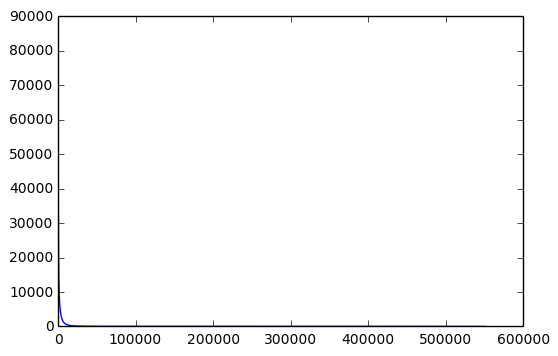

In [37]:
plt.plot(range(0, 550010, 10), ccdf_checkin)

In [39]:
from math import log

In [ ]:
"more "

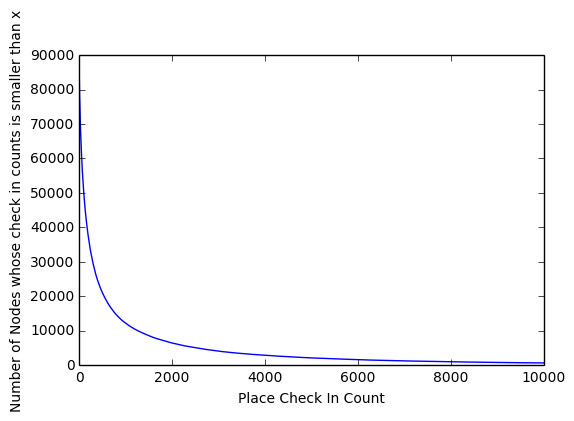

In [107]:
plt.plot(range(0, 550010, 10)[:1000], ccdf_checkin[:1000])
plt.xlabel("Place Check In Count")
plt.ylabel("Number of Nodes whose check in counts is smaller than x")

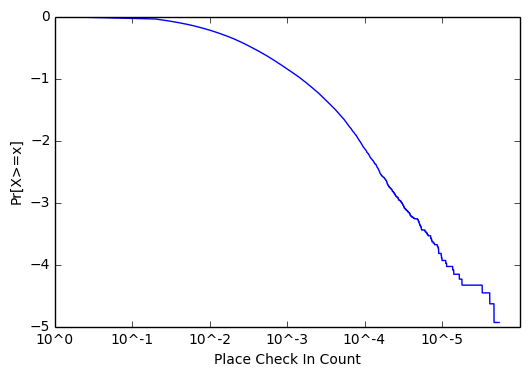

In [115]:
fig, ax = plt.subplots()
ax.set_xticklabels(["10^{}".format(x) for x in xrange(0, 7)])
ax.set_xticklabels(["10^{}".format(x) for x in xrange(0, -6, -1)])
plt.xlabel("Place Check In Count")
plt.ylabel("Pr[X>=x]")
plt.plot([0] + map(lambda x: log(x, 10), range(10, 550010, 10)[1:54300]), map(lambda x: log(x, 10), map(lambda x: float(x)/len(g.node), ccdf_checkin[:54300])))

In [124]:
def plot(data,filename):
    """ Plot Distribution """
    plt.plot(range(len(data)),data,'bo')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Freq')
    plt.xlabel('Degree')
    plt.savefig(filename + '_distribution.png')
    plt.clf()

    """ Plot CDF """
    s = float(data.sum())
    cdf = data.cumsum(0)/s
    plt.plot(range(len(cdf)),cdf,'bo')
    plt.xscale('log')
    plt.ylim([0,1])
    plt.ylabel('CDF')
    plt.xlabel('Degree')
    plt.savefig(filename + '_cdf.png')
    plt.clf()

    """ Plot CCDF """
    ccdf = 1-cdf
    plt.plot(range(len(ccdf)),ccdf,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([0,1])
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.savefig(filename + '_ccdf.png')
    plt.clf()

In [116]:
import numpy as np

In [119]:
checkin_bucket = np.bincount(map(lambda x: x["total_checkins"], g.node.itervalues()))

In [126]:
plot(checkin_bucket, "checkin", "Total Check-in")

TypeError: plot() takes exactly 2 arguments (3 given)